LABORATORIO Nº 2 - Clasificador de Temas Musicales de Spoootify - Grupo 7

✅ Montaña Marín

✅ Lich Cristian

✅ Sánchez Gerónimo


Se procede a importar las bibliotecas necesarias, como pandas y numpy.
se carga el conjunto de datos desde el archivo CSV en un DataFrame.

In [ ]:
# Importacion de todas las bibliotecas necesarias
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ##
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
import warnings

# Ignorar FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
#warnings.warn("ignore",some_fits_failed_message, FitFailedWarning)

import warnings

# Definir una función personalizada para filtrar las advertencias
def filter_specific_warning(message, category, filename, lineno, file=None, line=None):
    if "fits_failed_message" in str(message):
        return None  # Suprimir la advertencia
    else:
        return message

# Aplicar el filtro de advertencias
warnings.showwarning = filter_specific_warning


# Ruta del archivo
from google.colab import drive
drive.mount('/content/drive')
ruta_de_acceso = '/content/drive/MyDrive/2º Año/2ºCuatrimestre/Aprendizaje Maquina y Big Data/Laboratorio Nº2 - Clasificador de Temas Musicales de Spootify/Canciones_Spotify.csv'

#archivos = os.listdir(ruta_de_acceso)


# Carga el conjunto de datos desde un archivo CSV al dataframe data
data_Original = pd.read_csv(ruta_de_acceso)
data_Original


Mounted at /content/drive


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


PASO 1 - Procesamiento

En esta parte se trata de inspeccionar el dataset para ver que tipo de datos tiene, y tener una idea general de las características, tipos de variables, cantidad de datos etc que nos puedan servir para el análisis que se va a realizar posteriormente.

Se intenta visualizar las primeras filas del DataFrame para comprender la estructura del conjunto de datos.
Utilizamos métodos como info(), describe(), y value_counts() para obtener información sobre las características y etiquetas.

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

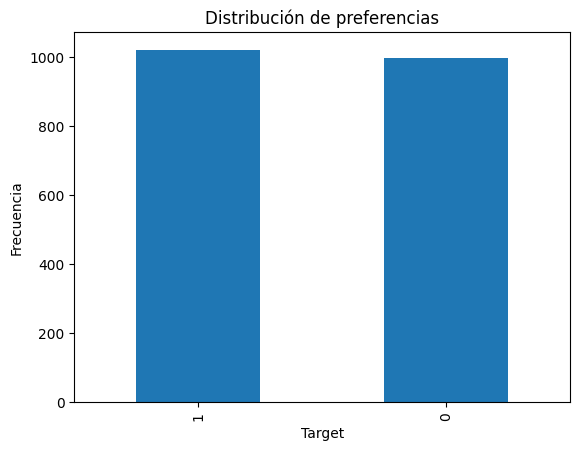

In [ ]:

                  # Paso 1: Preprocesamiento de Datos
                 ## ==================================

# 1.1. Exploración de datos
print(data_Original.head())
print(data_Original.info())
print (data_Original.describe())  # Estadistica descriptiva

# Visualización de datos
import matplotlib.pyplot as plt

# Distribucion de Preferencias, Métricas
data_Original['target'].value_counts().plot(kind='bar')
plt.title('Distribución de preferencias')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.show()

VISUALIZACION CON PAIRPLOT
La función sns.pairplot genera una matriz de gráficos de dispersión que muestra las relaciones entre todas las combinaciones posibles de variables en el conjunto de datos. Esto ayuda a identificar patrones, correlaciones y posibles relaciones entre las variables.
El pairplot es especialmente útil para la exploración inicial de datos y ayuda a identificar relaciones interesantes entre variables, como la correlación positiva o negativa, clusters de datos, o incluso variables que no tienen una influencia aparente en la variable objetivo. Esto puede ser útil para la selección de características y la comprensión de tus datos antes de aplicar algoritmos de machine learning.

In [ ]:
import seaborn as sns
import pandas as pd

## Crea el pairplot - hue es la variable objetivo y diag_king es el tipo de grafico, se usa kde ya que es el mas usado
## densidad de kernel

#### SE COMENTA ESTA PARTE PORQUE DEMORA BASTANTE
# sns.pairplot(data_Original, hue='target', diag_kind='kde')


REFINADO DEL DATASET: SE DEJARAN LAS COLUMNAS QUE INTERESEN PARA EL ESTUDIO

La seleccion de las variables se realizo en primera medida en forma intuitiva suponiendo cuales variables pesarian mas en el gusto o no de una canción. Luego se fue jugando con las características viendo que pasaba con las medidas cuando sacabamos o agregabamos una u otra y corrigiendo algunos hiperparámetros o constantes. Esta etapa se realiza varias veces hasta obtener resultados optimos de clasificación






✔ A continuación  se detalla los resultados obtenidos en las diferentes pruebas:

✅  data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6543771043771044

✍ SVM Cross-Validation Mean Accuracy: 0.6826487093153759

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6921548821548822

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6476318742985409

✍ Ensemble Accuracy: 0.6608910891089109



✅ data = data_Original[["danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.5988664421997756

✍ SVM Cross-Validation Mean Accuracy: 0.5964085297418631

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6758249158249158

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6481930415263748

✍ Ensemble Accuracy: 0.6361386138613861



✅ data = data_Original[["danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6395668715247294

✍ SVM Cross-Validation Mean Accuracy: 0.6716637401229147

✍ Decision Tree Cross-Validation Mean Accuracy: 0.663323090430202

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5992903131401814



✅ data = data_Original[["danceability", "energy", "instrumentalness", "speechiness", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6524729294702956

✍ SVM Cross-Validation Mean Accuracy: 0.6707345624817092

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6628255779923911

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6053116769095698



✅ data = data_Original[["danceability", "energy", "instrumentalness", "speechiness", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.5959613696224758

✍ SVM Cross-Validation Mean Accuracy: 0.6112891425226807

✍ Decision Tree Cross-Validation Mean Accuracy: 0.640547263681592

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5662203687445128




✅ data = data_Original[["danceability", "energy", "instrumentalness","loudness", "speechiness", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6468685981855429

✍ SVM Cross-Validation Mean Accuracy: 0.6795215100965758

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6841308165057068

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6375475563359672

✍ Ensemble Accuracy: 0.6608910891089109

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["danceability", "energy", "instrumentalness","loudness","valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6315700907228562

✍ SVM Cross-Validation Mean Accuracy: 0.6458735733099209

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6662496341820308

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5856233538191395

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["energy", "instrumentalness","loudness", "speechiness", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6172227099795141

✍ SVM Cross-Validation Mean Accuracy: 0.6562481709101552

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6553482587064677

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6166959321041848

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["energy", "tempo", "loudness", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.59337822671156

✍ SVM Cross-Validation Mean Accuracy: 0.5834792368125702

✍ Decision Tree Cross-Validation Mean Accuracy: 0.5873625140291807

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5764534231200897

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["energy", "loudness", "valence", "target"]].copy()

✍ muchos 0 clasificados como 1

✍ KNN Cross-Validation Mean Accuracy: 0.5904601571268236

✍ SVM Cross-Validation Mean Accuracy: 0.6195847362514029

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6210998877665544

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5730078563411897

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["energy", "instrumentalness", "loudness", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6064534231200897

✍ SVM Cross-Validation Mean Accuracy: 0.6414814814814815

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6435465768799102

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6068462401795734

✍ Ensemble Accuracy: 0.6361386138613861

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["danceability", "energy", "instrumentalness","loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.5963524130190797

✍ SVM Cross-Validation Mean Accuracy: 0.5959147025813692

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6727048260381594

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6516049382716049

✍ Ensemble Accuracy: 0.6311881188118812

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.5655892255892254

✍ SVM Cross-Validation Mean Accuracy: 0.592053872053872

✍ Decision Tree Cross-Validation Mean Accuracy: 0.5487766554433222

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5730639730639732

✍ Ensemble Accuracy: 0.5965346534653465

✍ K=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["danceability", "instrumentalness", "tempo", "valence", "target"]].copy()

✍KNN Cross-Validation Mean Accuracy: 0.5512345679012345

✍ SVM Cross-Validation Mean Accuracy: 0.5539842873176206

✍ Decision Tree Cross-Validation Mean Accuracy: 0.5690796857463524

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.5591582491582492

✍ Ensemble Accuracy: 0.5420792079207921

✍ K=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6023456790123457

✍ SVM Cross-Validation Mean Accuracy: 0.5889674523007856

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6880695847362515

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6610325476992144

✍ Ensemble Accuracy: 0.6732673267326733

✍ k=45

✍ random_state del split en 42

✍ random_state del K-folt en 42



✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6013580246913581

✍ SVM Cross-Validation Mean Accuracy: 0.6018518518518517

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6810998877665545

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6610325476992144

✍ Ensemble Accuracy: 0.6831683168316832

✍ K=45

✍ random_state del split en 42

✍ random_state del K-folt en 52



✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6013580246913581

✍ SVM Cross-Validation Mean Accuracy: 0.6018518518518517

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6742312008978676

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6610325476992144

✍ Ensemble Accuracy: 0.6806930693069307

✍ K=45

✍ random_state del split en 48

✍ random_state del K-folt en 52



✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.6023456790123457

✍ SVM Cross-Validation Mean Accuracy: 0.5814478114478114

✍ Decision Tree Cross-Validation Mean Accuracy: 0.6786980920314253

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6610325476992144

✍ Ensemble Accuracy: 0.6658415841584159

✍ K=45

✍ random_state del split en 40

✍ random_state del K-folt en 52



✅ data = data_Original[["energy", "instrumentalness", "tempo", "valence", "target"]].copy()

✍ KNN Cross-Validation Mean Accuracy: 0.5512345679012345

✍ SVM Cross-Validation Mean Accuracy: 0.5549831649831649

✍ Decision Tree Cross-Validation Mean Accuracy: 0.5720650953984286

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.559158249158249

✍ Ensemble Accuracy: 0.5420792079207921

✍ K=45

✍ random_state del split en 40

✍ random_state del K-folt en 52


En resumen en las diferentes pruebas realizadas y detalladas anteriormente, la mejor preformance del ensamble de los modelos estudiados se obtuvo con:

✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

K=45

random_state del split en 42

random_state del K-folt en 52


✍ KNN Cross-Validation Mean Accuracy: 0.6013580246913581

✍ SVM Cross-Validation Mean Accuracy: 0.6018518518518517

✍ Decision Tree Cross-Validation Mean Accuracy: 0.7005162738496071

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6610325476992144

✍ Ensemble Accuracy: 0.6931683168316832


In [ ]:

## la Mejor data = data_Original[["danceability", "energy", "instrumentalness","loudness", "speechiness", "valence", "target"]].copy()
data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

data

## Crea el pairplot del dataset refinado - hue es la variable objetivo y diag_king es el tipo de grafico, se usa kde ya que es el mas usado
## densidad de kernel
sns.pairplot(data, hue='target', diag_kind='kde')



PASO 2 - Division de datos en conjunto de entrenamiento y testeo

Aqui se divide el conjunto de datos en conjunto de entrenamiento, testeo y prueba.

NOTA: Se entendía que la característica y artista era categórica, y se intento codificarla en valores numéricos con one-hot encoding pero como este método lo que hace es generar por cada artista una característica mas, se hacía imposible el trabajo, tardo 26 minutos y no terminó de generarlas, por lo que se corto la ejecución y se optó por sacar esta característica.

X - contendrá las características de las canciones (las que entren en evaluacion, menos la etiqueta target).
y - contendrá la etiqueta de preferencia del usuario (columna "target").

Luego dividimos los datos en conjuntos de entrenamiento y prueba.

Utiliza scikit-learn para dividir los datos en una proporción, por ejemplo, 80% para entrenamiento y 20% para prueba. Esto tambien se ira ajustando para ver con que porcentaje se obtiene el mejor resultado.

In [ ]:

                          # Paso 2: División de Datos en X e y
                          ## =================================
##  X las características a evaluar - sin el target
##  y el target

datax = data.drop(['target' ], axis=1) # elimino característica target
X = datax.iloc[:, 1:-1]  # Características de la canción, sin el target

y = data['target'] # Etiqueta de preferencia

##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) ## test_size = 0.2

y_train.count(), y_test.count()

X_train

,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
746,0.827,0.462,0.543000,0.0886,-10.673,0.0623,123.994
1381,0.630,0.684,0.001080,0.1030,-6.740,0.0399,142.952
240,0.742,0.945,0.165000,0.1310,-6.445,0.0428,112.977
1645,0.510,0.747,0.000000,0.2330,-4.124,0.0651,125.951
1460,0.529,0.739,0.000255,0.3900,-5.356,0.0543,149.915
...,...,...,...,...,...,...,...
1130,0.385,0.866,0.000000,0.1110,-2.817,0.0697,176.014
1294,0.211,0.649,0.000000,0.1170,-7.280,0.0393,150.110
860,0.691,0.714,0.016400,0.1780,-9.694,0.0460,91.045
1459,0.633,0.964,0.015900,0.2040,-3.573,0.0298,124.022


PASO 3 - Modelado

La estrategia elegida fue, trabajar con un arreglo de hiperparámetros denominado param (parametros a evaluar) y luego utilizar el GridSerachCV
para que nos verifique la mejor combinacion de estos.

Se definio una variable crosval que utiiliza el Kfold para poder cambiarla en forma automática en todos los métodos a la vez.

Para nuestro análisis se utilizarán 4 métodos que fueron los vistos en clase. knn - svm - Decision Tree y Naive Baye, mas dos mètodos adicionales a lo último del colab.

✅ KNN.- K-Nearest Neighbors (KNN)
KNN es un algoritmo de clasificación basado en la proximidad. Funciona de la siguiente manera:

✍ Para clasificar un nuevo punto de datos, calcula la distancia entre este punto y los k puntos de datos más cercanos en el conjunto de entrenamiento.

✍ Luego, determina la clase del punto de datos desconocido basándose en la clase más común entre los k vecinos más cercanos.

✍ El valor de k es un hiperparámetro que se debe ajustar.

✅ SVM.- Support Vector Machine
SVM es un algoritmo de clasificación que busca encontrar el hiperplano que mejor separa las clases en el espacio de características. Funciona de la siguiente manera:

✍ Busca el hiperplano que maximiza la distancia entre los puntos de datos más cercanos de diferentes clases, llamados vectores de soporte.

✍ Puede utilizar funciones de kernel para mapear los datos a un espacio de características de mayor dimensión, lo que puede ayudar a separar clases no lineales.

✍ SVM es eficaz en la clasificación tanto lineal como no lineal.


✅ Arbol de decisión,. Decision Tree

Los árboles de decisión son un método de clasificación basado en reglas. Funcionan de la siguiente manera:

✍ Divide el conjunto de datos en subconjuntos más pequeños de manera recursiva, tomando decisiones basadas en atributos particulares.

✍ Cada nodo interno del árbol representa una decisión basada en un atributo, y las hojas del árbol representan las clases objetivo.

✍ Los árboles de decisión pueden ser utilizados para clasificación y regresión.


✅ Naive Bayes

Naive Bayes es un algoritmo probabilístico que se basa en el teorema de Bayes. Funciona de la siguiente manera:

✍ Utiliza la probabilidad condicional para estimar la probabilidad de que un punto de datos pertenezca a una clase dada.

✍ Hace una suposición "ingenua" de independencia condicional entre los atributos, lo que simplifica los cálculos.

✍ Es especialmente útil cuando se tienen muchas características y funciona bien en problemas de clasificación de texto, como el análisis de sentimientos.


✅ Regresión Lógica.- Logistic Regression

A pesar de su nombre, la regresión logística se utiliza comúnmente para problemas de clasificación binaria. Funciona de la siguiente manera:

✍ Modela la relación entre las características de entrada y la probabilidad de que un punto de datos pertenezca a una de las dos clases (0 o 1).

✍ Utiliza una función logística para transformar una combinación lineal de las características en una probabilidad.

✍ Se entrena ajustando los coeficientes del modelo para minimizar la función de costo, como la entropía cruzada.


✅ XGBoost:

XGBoost es una técnica de ensemble learning que utiliza árboles de decisión como base. Funciona de la siguiente manera:

✍ Construye múltiples árboles de decisión en serie, donde cada árbol intenta corregir los errores del anterior.

✍ Utiliza una función de pérdida específica para optimizar el entrenamiento y evitar sobreajuste.

✍ Puede manejar problemas de clasificación y regresión y es conocido por su eficiencia y precisión.

Esto solo son conceptos resumidos del funcionamiento de estos métodos.


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
                          # Paso 3: Modelado y entrenamiento con los mejores hiperparametros de cada método
                          ## ==============================================================================
## La estrategia fue utilizar el param para colocar los parametros a evaluar y luego utilizar el GridSerachCV
## para que nos verifique la mejor combinacion de estos
# Se definio una variable crosval que utiiliza el Kfold para poder cambiarla en forma automática en todos los métodos
## a la vez.


# Se define el "K" para la validacion cruzada, este será el mismo para todos los métodos
k = 45

# Define una estrategia de validación cruzada (KFold)
crosval = KFold(n_splits=k, shuffle=True, random_state=52)   # random_state=42


################ 3.1. Modelo K-Nearest Neighbors (KNN) ####################################################

# declaración de hiperparámetros para knn
param_knn= {
    'n_neighbors': [3, 5, 6, 7, 8],
    #'weights': ['uniform', 'distance']
}

# entrenamiento con los hiperparámetros declarados
knn_model = GridSearchCV(KNeighborsClassifier(), param_knn, cv=crosval)  # Puedes ajustar el número de vecinos
knn_model.fit(X_train, y_train.ravel())  #(X_train, y_train)
# La mejor combinacion de los hiperparámetros
best_knn = knn_model.best_estimator_


################ 3.2. Modelo Support Vector Machines (SVM) ####################################################

# declaración de hiperparámetros para svm
param_svm= {
    'C': [1, 3, 5, 7],
    'kernel': ['rbf'],
    'gamma': [1, 3, 5]
}

svm_model = GridSearchCV(SVC(), param_svm, cv=crosval)
svm_model.fit(X_train, y_train.ravel())
best_svm = svm_model.best_estimator_


################3.3. Modelo Árbol de Decisión ####################################################

# declaración de hiperparámetros para dt (decision tree)
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 10, 20, 30],  #[None, 10, 20, 30],
    'min_samples_split': [2, 3],   #[2, 10, 20] #[2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
}

dt_model = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=crosval) #(criterion='gini', max_depth=3, min_samples_split=50)  # 3 -Puedes ajustar criterion = 'gini' o 'entropy' y la profundidad máxima
dt_model.fit(X_train, y_train.ravel())
best_dt = dt_model.best_estimator_


################ 3.4. Modelo Naive Bayes ####################################################

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
best_nb = nb_model.fit(X_train, y_train)
#best_nb = nb_model.best_estimator_



PASO 4 - Evaluacion del Rendimiento

Se toma el conjunto de entrenamiento y se comienza a entrenar cada uno de los metodos.

Posteriormente se calculan las métricas como accuracy, precisión, recall, F1-score.

Se van documentando los resultados de cada modelo y compárandolos para seleccionar el mejor desempeño.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

                          # Paso 4: Evaluación del Rendimiento
                          ## ==============================================================================

# Se realiza el entrenamiento

## knn_predictions = knn_model.predict(X_test)
knn_predictions = best_knn.predict(X_test)
## svm_predictions = svm_model.predict(X_test)
svm_predictions = best_svm.predict(X_test)
## dt_predictions = dt_model.predict(X_test)
dt_predictions = best_dt.predict(X_test)
## nb_predictions = nb_model.predict(X_test)
nb_predictions = best_nb.predict(X_test)

# 4.1. Evalúa cada modelo validacion simple

## ACCURACY DE LOS MODELOS
accuracy_knn = accuracy_score(y_test, knn_predictions)
accuracy_svm = accuracy_score(y_test, svm_predictions)
accuracy_dt = accuracy_score(y_test, dt_predictions)
accuracy_nb = accuracy_score(y_test, nb_predictions)


## PRECISION DE LOS MODELOS
precision_knn = precision_score(y_test, knn_predictions)
precision_svm = precision_score(y_test, svm_predictions)
precision_dt = precision_score(y_test, dt_predictions)
precision_nb = precision_score(y_test, nb_predictions)


## RECALL DE LOS MODELOS
recall_knn = recall_score(y_test, knn_predictions)
recall_svm = recall_score(y_test, svm_predictions)
recall_dt = recall_score(y_test, dt_predictions)
recall_nb = recall_score(y_test, nb_predictions)


# F1 DE TODOS LOS MODELOS
f1_knn = f1_score(y_test, knn_predictions)
f1_svm = f1_score(y_test, svm_predictions)
f1_dt = f1_score(y_test, dt_predictions)
f1_nb = f1_score(y_test, nb_predictions)


print("Modelo   - Accuracy - Precision  - Recall  -    F1        ")
print("KNN      -   {:.2f}   -    {:.2f}    -  {:.2f}   -   {:.2f}".format(accuracy_knn, precision_knn, recall_knn, f1_knn))
print("SVM      -   {:.2f}   -    {:.2f}    -  {:.2f}   -   {:.2f}".format(accuracy_svm, precision_svm, recall_svm, f1_svm))
print("D. TREE  -   {:.2f}   -    {:.2f}    -  {:.2f}   -   {:.2f}".format(accuracy_dt, precision_dt, recall_dt, f1_dt))
print("N. BAYES -   {:.2f}   -    {:.2f}    -  {:.2f}   -   {:.2f}".format(accuracy_nb, precision_nb, recall_nb, f1_nb))




Modelo   - Accuracy - Precision  - Recall  -    F1        
KNN      -   0.58   -    0.58    -  0.57   -   0.57
SVM      -   0.60   -    0.58    -  0.65   -   0.61
D. TREE  -   0.73   -    0.74    -  0.68   -   0.71
N. BAYES -   0.67   -    0.68    -  0.60   -   0.64


VALIDACION CRUZADA

La validación cruzada es útil para obtener estimaciones más robustas del rendimiento del modelo.

In [ ]:
from sklearn.model_selection import cross_val_score


k = 45
# Realiza una validación cruzada para cada uno de los modelos
## knn_scores = cross_val_score(knn_model, X, y, cv=30)
knn_scores = cross_val_score(best_knn, X, y, cv=k)
## svm_scores = cross_val_score(svm_model, X, y, cv=30)
svm_scores = cross_val_score(best_svm, X, y, cv=k)
## dt_scores = cross_val_score(dt_model, X, y, cv=30)
dt_scores = cross_val_score(best_dt, X, y, cv=k)
## nb_scores = cross_val_score(nb_model, X, y, cv=30)
nb_scores = cross_val_score(best_nb, X, y, cv=k)

#ensemble_scores = cross_val_score(ensemble_model, X, y, cv=5)

# Imprime los resultados de validación cruzada
print("Cross-Validation Mean Accuracy - KNN :    ", knn_scores.mean())
print("Cross-Validation Mean Accuracy - SVM :    ", svm_scores.mean())
print("Cross-Validation Mean Accuracy - D. Tree :", dt_scores.mean())
print("Cross-Validation Mean Accuracy - N. Bayes :", nb_scores.mean())

#print("Ensemble Cross-Validation Mean Accuracy:", ensemble_scores.mean())

Cross-Validation Mean Accuracy - KNN :     0.6013580246913581
Cross-Validation Mean Accuracy - SVM :     0.6018518518518517
Cross-Validation Mean Accuracy - D. Tree : 0.6782042648709316
Cross-Validation Mean Accuracy - N. Bayes : 0.6610325476992144


MATRICES DE CONFUSION

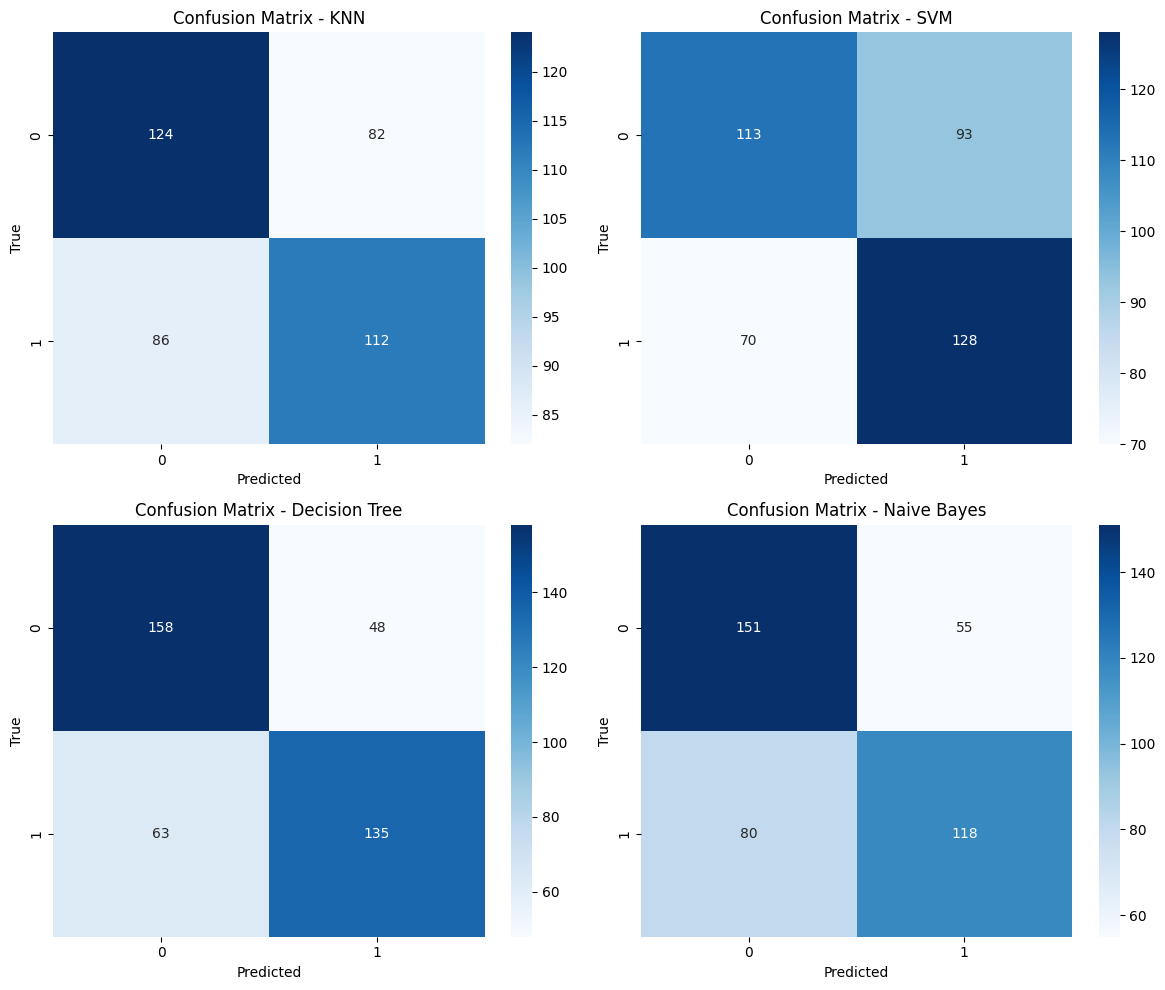

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Después de evaluar cada modelo generamos las Matrices de Confusión para cada modelo:

# 4.2. Evalúa cada modelo
## knn_predictions = knn_model.predict(X_test)
knn_predictions = best_knn.predict(X_test)
## svm_predictions = svm_model.predict(X_test)
svm_predictions = best_svm.predict(X_test)
## dt_predictions = dt_model.predict(X_test)
dt_predictions = best_dt.predict(X_test)
## nb_predictions = nb_model.predict(X_test)
nb_predictions = best_nb.predict(X_test)
## lr_predictions = lr_model.predict(X_test)
#lr_predictions = best_lr.predict(X_test)



models = ["KNN", "SVM", "Decision Tree", "Naive Bayes"]    #    , "Logic. Regression"]
predictions = [knn_predictions, svm_predictions, dt_predictions, nb_predictions] #, lr_predictions]

# Crear un subplot con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    model = models[i]
    pred = predictions[i]
    cm = confusion_matrix(y_test, pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model}')

plt.tight_layout()
plt.show()

PASO 5 - Ensamble de Modelos

In [ ]:
                           # Paso 5: Ensamble de Modelos
                          ## ==============================================================================

ensemble_model = VotingClassifier(estimators=[('knn', knn_model), ('svm', svm_model), ('dt', dt_model), ('nb', nb_model)], voting='hard')   # , ('lr', lr_model)
# ensemble_model = VotingClassifier(estimators=[('knn', best_knn), ('svm', best_svm), ('dt', best_dt), ('nb', best_nb)], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

# Evalúa el rendimiento del ensamblaje

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)
print("")
print("")
print("=============================================================")
print("||         SCORES DEL ENSAMBLADO DE MODELOS                ||")
print("=============================================================")
print("|| Accuracy  -  Precision  -  Recall  -   F1               ||")
print("||   {:.2f}    -   {:.2f}      -   {:.2f}   -  {:.2f}              ||".format(ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1))
print("=============================================================")





||         SCORES DEL ENSAMBLADO DE MODELOS                ||
|| Accuracy  -  Precision  -  Recall  -   F1               ||
||   0.68    -   0.72      -   0.56   -  0.63             ||


MATRIZ DE CONFUSION DE ENSAMBLE DE MODELOS

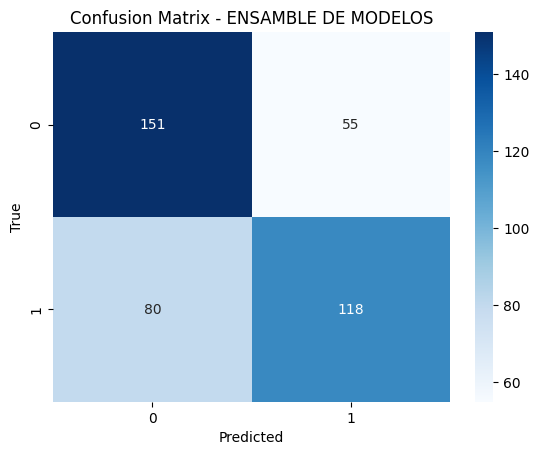

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de confusión para el Ensamblado de Modelos
ensemble_model = confusion_matrix(y_test, ensemble_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ENSAMBLE DE MODELOS')
plt.show()

CLASIFICADORES ADICIONALES A LO PEDIDO EN EL LABORATORIO

Se toma el mismo dataset con los mismas características y el mismo K, las mismas semillas de random_state, a fin de comparar sus performance, respecto de los clasificadores vistos en clase.

Clasificador Logistic Regression y XGBoost

Logistic Regression Cross-Validation Mean Accuracy: 0.6450953984287319
XGBoost Cross-Validation Mean Accuracy: 0.7397643097643097


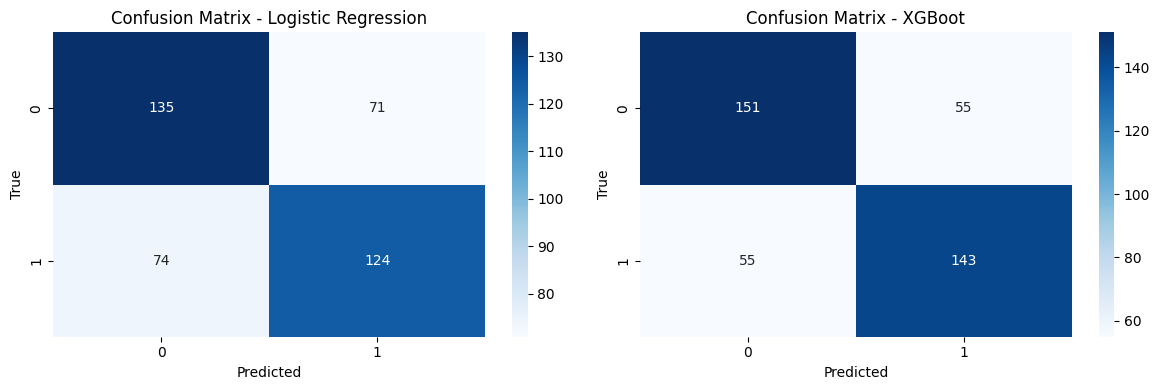



|| Metodo    -   Accuracy  -  Precision  -  Recall  -   F1 ||
|| Logistic R. -  0.64    -   0.64      -   0.63   -  0.63 ||
|| XGBoost     -  0.73    -   0.72      -   0.72   -  0.72 ||


In [ ]:
# IMPORTACION DE LIBRERIAS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paso 3: Modelado y entrenamiento con los mejores hiperparametros de cada método

# Se define el "K" para la validacion cruzada, este será el mismo para todos los métodos
k = 45
# Define una estrategia de validación cruzada (KFold)
crosval = KFold(n_splits=k, shuffle=True, random_state=52)   # random_state=42

################ 3.5. Modelo LogisticRegression ####################################################
lr_model = LogisticRegression()

# declaración de hiperparámetros para lr (Logistic Regression)
param_lr = {
    'penalty': [None, 'l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    #'solver': ['liblinear', 'saga'],  # 'sag', 'newton-cg', 'lbfgs',
    'max_iter': [500], #200, 300],
    #'multi_class': ['ovr', 'multinomial'],
    'class_weight': [None, 'balanced']
}

# Realiza Grid Search para encontrar la mejor combinación de hiperparámetros
lr_model = GridSearchCV(lr_model, param_lr, cv=crosval)   #, scoring='accuracy'
lr_model.fit(X_train, y_train)

# Obtiene la mejor combinación de hiperparámetros
#best_params_lr = lr_model.best_params_
best_lr = lr_model.best_estimator_


################ 3.5. Modelo XGBoot ####################################################
!pip install xgboost
import xgboost as xgb

# Crea un modelo de XGBoost
xgb_model = xgb.XGBClassifier()


# declaración de hiperparámetros para xgb (XGBoost)
param_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  # Valores posibles para la tasa de aprendizaje
    'n_estimators': [100], # 200, 300],     # Valores posibles para el número de estimadores
    'max_depth': [3, 4, 5]              # Valores posibles para la profundidad máxima del árbol
}

xgb_model = GridSearchCV(estimator = xgb_model, param_grid=param_xgb,  cv=crosval) #scoring='accuracy',
xgb_model.fit(X_train, y_train)
best_xgb = xgb_model.best_estimator_
###


# Entrena el mejor modelo en el conjunto de entrenamiento
best_lr.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)


# Entrenamiento del Modelo con validacion Simple
# Realiza predicciones en el conjunto de prueba con el modelo de Regresión Logística y XGBoost
lr_predictions = best_lr.predict(X_test)
xgb_predictions = best_xgb.predict(X_test)

# Evaluación del rendimiento
# Accuracy
accuracy_lr = accuracy_score(y_test, lr_predictions)
accuracy_xgb = accuracy_score(y_test, xgb_predictions)

# Precision
precision_lr = precision_score(y_test, lr_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)

# Recall
recall_lr = recall_score(y_test, lr_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)

# F1
f1_lr = f1_score(y_test, lr_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)


#Evaluacion de los Modelos con Validacion Cruzada

from sklearn.model_selection import cross_val_score

k = 45
# Realiza una validación cruzada para cada uno de los modelos
lr_scores = cross_val_score(best_lr, X, y, cv=k)  # 5-fold cross-validation
xgb_scores = cross_val_score(best_xgb, X, y, cv=k)  # 5-fold cross-validation

# Imprime los resultados de validación cruzada
print("Logistic Regression Cross-Validation Mean Accuracy:", lr_scores.mean())
print("XGBoost Cross-Validation Mean Accuracy:", xgb_scores.mean())

# Matriz de confusión
# conf_matrix = confusion_matrix(y_test, lr_predictions)
# print("Matriz de Confusión:")
# print(conf_matrix)

# conf_matrix = confusion_matrix(y_test, xgb_predictions)
# print("Matriz de Confusión:")
# print(conf_matrix)

models = ["Logistic Regression", "XGBoot"]    #    , "Logic. Regression"]
predictions = [lr_predictions, xgb_predictions] #, lr_predictions]

# Crear un subplot con 1 filas y 1 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, ax in enumerate(axes.flat):
    model = models[i]
    pred = predictions[i]
    cm = confusion_matrix(y_test, pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model}')

plt.tight_layout()
plt.show()


# # Reporte de clasificación
# report = classification_report(y_test, lr_predictions)
# print("Reporte de Clasificación:")
# print(report)

print("")
print("")
print("=============================================================")
print("|| Metodo    -   Accuracy  -  Precision  -  Recall  -   F1 ||")
print("=============================================================")
print("|| Logistic R. -  {:.2f}    -   {:.2f}      -   {:.2f}   -  {:.2f} ||".format(accuracy_lr, precision_lr, recall_lr, f1_lr))
print("|| XGBoost     -  {:.2f}    -   {:.2f}      -   {:.2f}   -  {:.2f} ||".format(accuracy_xgb, precision_xgb, recall_xgb, f1_xgb))
print("=============================================================")



ENSAMBLADO DE TODOS LOS MODELOS - knn - svm - Desicion Tree - Naive B. Logistic Reg. - XGBoost

In [ ]:
                          # Paso 5.1: Ensamble de Modelos
                          ## ==============================================================================

ensemble_model = VotingClassifier(estimators=[('knn', knn_model), ('svm', svm_model), ('dt', dt_model), ('nb', nb_model), ('lr', lr_model), ('xgb', xgb_model)], voting='hard')   #
# ensemble_model = VotingClassifier(estimators=[('knn', best_knn), ('svm', best_svm), ('dt', best_dt), ('nb', best_nb)], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

# Evalúa el rendimiento del ensamblaje

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)


print("")
print("")
print("===============================================================")
print("||        SCORES DEL ENSAMBLADO DE MODELOS                   ||")
print("===============================================================")
print("|| Accuracy  -  Precision  -  Recall  -   F1                 ||")
print("||   {:.2f}    -   {:.2f}      -   {:.2f}   -  {:.2f}                ||".format(ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1))
print("===============================================================")




||        SCORES DEL ENSAMBLADO DE MODELOS                   ||
|| Accuracy  -  Precision  -  Recall  -   F1                 ||
||   0.72    -   0.74      -   0.65   -  0.69                ||


PASO 6 - DOCUMENTACION

✔ Se realizo un estudio de la variables a considerar, esto no fue facil debido a la inexperiencia en el tema, por lo que a lo primero costo mucho interpretar como se relacionan y que era importante y que no.

✔ Luego se utilizo el pairplot donde se puede apreciar que variables están mas relacionadas con el target. Tampoco fue sencillo interpretar y tratar de seleccionar las características mas apropiadas para tener en cuenta.

✔ Una vez que mas o menos identificamos que características tendrían mayor incidencia para garantizar el agrado del tema, se fue particionando el conjunto de datos los conjunto de testeo, entrenamiento y validacion.

✔ Optamos por la opcion de ir haciendo todos los métodos con su conjunto de hiperparámetros y utilizar el GridSearchCV para que busque la mejor combinacion de estos, para cada uno de los modelos.

✔ Se realizo validacion cruzada tambien con la posibilidad de modificar el K en todos y así realizar las pruebas.

✔ Se obtiene el Accuracy Score de cada uno, como así también se agregarn las métricas de Precision, Recall y F1

✔ Se grafica la Matriz de confusion de cada uno por separado y se muestran en un sobplot.

✔ Se calcula el Accuracy Score, Precision, Recall y F1 del ensamble de los métodos.

✔ Se realiza el ensamble de los métodos y posteriormente se realiza la gráfica de la matriz de confusión.

En resumen en las diferentes pruebas realizadas y detalladas anteriormente, la mejor preformance del ensamble de los modelos estudiados se obtuvo con:

✅ data = data_Original[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "target"]].copy()

K=45

random_state del split en 42

random_state del K-folt en 52


✍ KNN Cross-Validation Mean Accuracy: 0.6013580246913581

✍ SVM Cross-Validation Mean Accuracy: 0.6018518518518517

✍ Decision Tree Cross-Validation Mean Accuracy: 0.7005162738496071

✍ Naive Bayes Cross-Validation Mean Accuracy: 0.6610325476992144

✍ Ensemble Accuracy: 0.6931683168316832


ADICIONAL AL PROYECTO

✔ En forma adicional a lo solicitado, se agregan dos métodos de clasificación que no hemos visto en clase, pero que ayuda a investigar e interpretar algunos clasificadores mas, Estos son:
Logistic Regression y XGBoost.

✔ La metodología implementada fue igual que con los anteriores, paso por paso, se tomaron los mismos datos, con el mismo K y las mismas semillas a fin de ver como es el desempeño de cada método.

✔ Se realiza el entrenamiento y validacion simple y validacion cruzado con un K=45.

✔ Se buscan la mejor combinacion de características y se entrenan con ellas.

✔ Se extraen las metricas de Accuracy, Precision, recall y F1 para ambos y se realiza la gráfica de la matriz de confusión.

✔ El Mejor desempeño de todos lo obtiene el metodo XGBoost con un accuracy de 0.73.

✔ Luego se realiza el ensamblado de los 6 métodos y se obtienen las métricas

  SCORES DEL ENSAMBLADO DE MODELOS                   
   Accuracy  -  Precision  -  Recall  -   F1   
     0.72     -   0.74      -   0.65   -  0.69

Siendo esta performance mejor, que la del ensamblado anterior de los 4 métodos.